In [1]:
using JLD

In [2]:
include("AxionMC.jl")
include("AxionPlotting.jl")

exclusionreportplot (generic function with 1 method)

In [3]:
brighten(color, v) = matplotlib[:colors][:to_rgb](color) .^ (1 - v)

brighten (generic function with 1 method)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] zero_arg_matrix_constructor(::String) at ./deprecated.jl:1274
 [3] Type at ./deprecated.jl:1277 [inlined]
 [4] (::Core.#kw#Type)(::Array{Any,1}, ::Type{AxionSim}) at ./<missing>:0
 [5] include_string(::String, ::String) at ./loading.jl:522
 [6] include_string(::Module, ::String, ::String) at /Users/rawlik/.julia/v0.6/Compat/src/Compat.jl:174
 [7] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/rawlik/.julia/v0.6/IJulia/src/execute_request.jl:158
 [8] (::Compat.#inner#17{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at /Users/rawlik/.julia/v0.6/Compat/src/Compat.jl:488
 [9] eventloop(::ZMQ.Socket) at /Users/rawlik/.julia/v0.6/IJulia/src/eventloop.jl:8
 [10] (::IJulia.##14#17)() at ./task.jl:335
while loading In[4], in expression starting on line 4


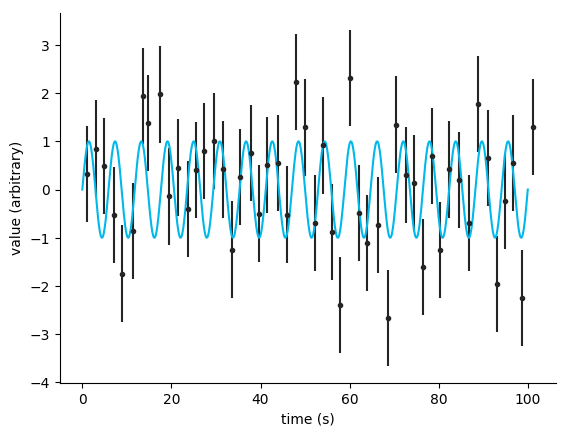

In [4]:
# seed the random number generator
srand(1)

as = AxionSim(
    cyclelength = 2SECOND,
    runlengths = 50ones(Int, 1),
    sR = 1,
    startrandomization = 0.2SECOND)


realA = 1
realf = 0.17
R = mcR(as, realA, realf, 0, 0)

plott = linspace(0, 100, 1000)
plot(plott, realA .* sin.(2π * realf .* plott), color = "C2", label = "signal")
errorbar(as.mt, R, yerr = as.sR, fmt = ".", color = "C0", label = "measurements")
xlabel("time (s)")
ylabel("value (arbitrary)")
# legend()

savefig("../gfx/axions/basic_signal.pdf")

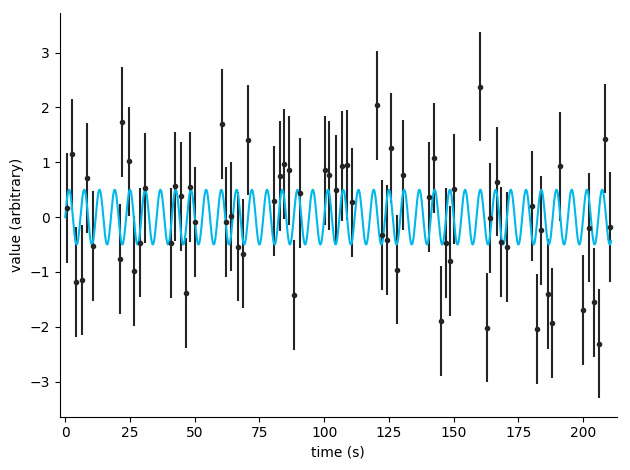

In [7]:
# seed the random number generator
srand(1)

startt = vcat([ t .+ float.(0:2:10) for t in float.(0:20:200) ]...)
startt .+= randn(length(startt)) * 0.3
endt = startt + 1
endt .+= randn(length(startt)) * 0.1

as = AxionSim(
    ct = CycleTimes(startt, endt),
    runlengths = length(startt) * ones(Int, 1),
    sR = 1)


realA = 0.5
realf = 0.17
R = mcR(as, realA, realf, 0, 0)

plott = linspace(0, maximum(as.ct.t), 1000)
plot(plott, realA .* sin.(2π * realf .* plott), color = "C2", label = "signal")
errorbar(as.mt, R, yerr = as.sR, fmt = ".", color = "C0", label = "measurements")
xlabel("time (s)")
ylabel("value (arbitrary)")
# legend()

margins(x = 0.01)
tight_layout()

savefig("../gfx/axions/basic_signal.pdf")

In [8]:
cleverfrequencies(as)

0.004746593026809439:0.004746593026809439:0.30852854674261354

In [9]:
# freqs = cleverfrequencies(as)

freqs = (0 : 0.005 : 1)[2:end]

irealf = searchsortedfirst(freqs, realf)

34

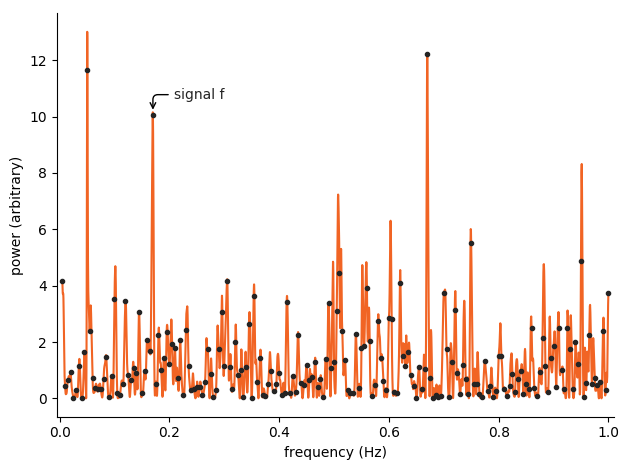

In [11]:
densefreqs = logspace(log10.(extrema(freqs))..., 10000)

p = periodogramLSSA(freqs, as, R)

plot(densefreqs, periodogramLSSA(densefreqs, as, R), color = "C6", label = "dense periodogram")
plot(freqs, p, ".", label = "original periodogram")

annotate("signal f", color = "C0",
         xy=(realf, 1.01 * p[searchsortedfirst(freqs, realf)]), xycoords="data",
         xytext=(15, 10), textcoords="offset points",
         horizontalalignment = "left",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=0,angleB=90,rad=5"))

# axvline(realf)
# axvline(2realf)
# axvline(3realf)
# axvline(4realf)

xlabel("frequency (Hz)")
ylabel("power (arbitrary)")

margins(x = 0.01)

# legend()

# ylim(ymax = 0.155)
tight_layout()

savefig("../gfx/axions/basic_periodogram.pdf")

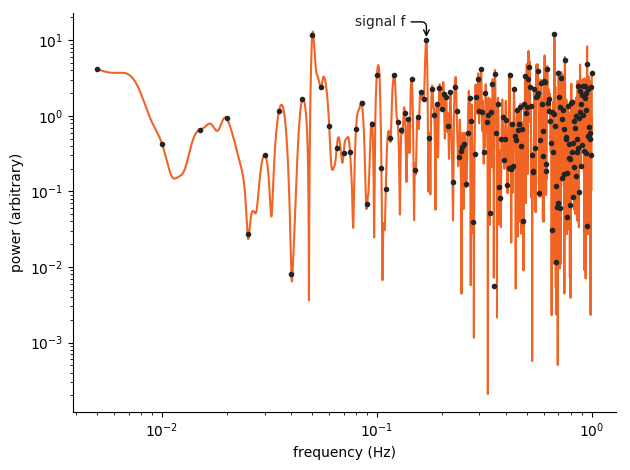

In [12]:
densefreqs = logspace(log10.(extrema(freqs))..., 10000)

p = periodogramLSSA(freqs, as, R)

plot(densefreqs, periodogramLSSA(densefreqs, as, R), color = "C6", label = "dense periodogram")
plot(freqs, p, ".", label = "original periodogram")

annotate("signal f", color = "C0",
         xy=(realf, 1.01 * p[irealf]), xycoords="data",
         xytext=(-15, 10), textcoords="offset points",
         horizontalalignment = "right",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=0,angleB=90,rad=5"))

# axvline(realf)
# axvline(2realf)
# axvline(3realf)
# axvline(4realf)

xlabel("frequency (Hz)")
ylabel("power (arbitrary)")

xscale("log")
yscale("log")

tight_layout()

savefig("../gfx/axions/basic_periodogram_loglog.pdf")

# ylim(ymax = 0.155)

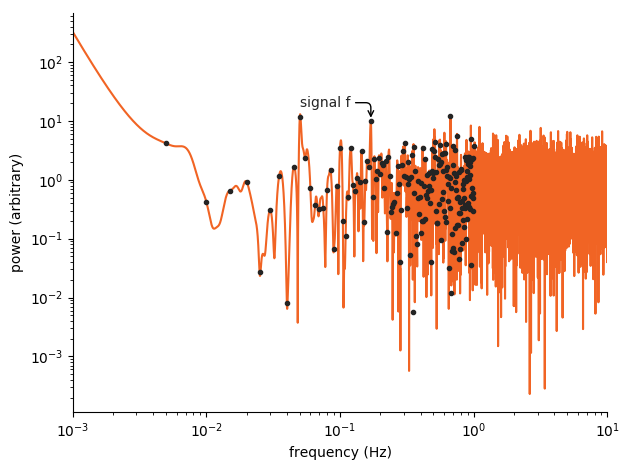

In [13]:
# densefreqs = logspace(log10.(extrema(freqs))..., 10000)
densefreqs = logspace(-3, 1, 10000)

p = periodogramLSSA(freqs, as, R)

plot(densefreqs, periodogramLSSA(densefreqs, as, R), color = "C6", label = "dense periodogram")
plot(freqs, p, ".", label = "original periodogram")

annotate("signal f", color = "C0",
         xy=(realf, 1.01 * p[irealf]), xycoords="data",
         xytext=(-15, 10), textcoords="offset points",
         horizontalalignment = "right",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=0,angleB=90,rad=5"))

# axvline(realf)
# axvline(2realf)
# axvline(3realf)
# axvline(4realf)

xlabel("frequency (Hz)")
ylabel("power (arbitrary)")

xscale("log")
yscale("log")

margins(x = 0)

tight_layout()

savefig("../gfx/axions/basic_periodogram_loglog.pdf")

# ylim(ymax = 0.155)

In [416]:
nullperiodograms = mcperiodograms(as, freqs, 0, realf, mcmultiplicity = 10000, fitoffsets = false, simjumpsize = 0)

Progress: 100%|█████████████████████████████████████████| Time: 0:03:04


200×10000 Array{Float64,2}:
 2.4115      3.01895    1.11785     …  1.29375     1.34774   0.793722 
 0.80468     4.89469    1.5292         1.65645     0.186433  4.68103  
 0.290149    0.177592   0.551365       1.82463     1.044     2.92786  
 1.18069     0.216803   0.0948471      0.458254    0.169663  1.6399   
 0.0511064   0.152372   1.68176        1.44783     1.86183   2.32157  
 0.814145    1.21172    0.0243727   …  3.85312     1.99204   1.28681  
 1.61912     0.07674    0.256169       1.5897      0.646703  1.30974  
 0.234188    5.46298    1.37845        0.205711    0.193319  0.228263 
 0.982101    6.68723    0.446101       4.70787     2.2546    0.209181 
 3.17817     2.29413    0.180703       2.85376     4.51523   0.0517076
 0.638849    5.54596    0.547947    …  0.117946    0.262535  0.282264 
 0.203206    0.454239   2.85902        1.47912     0.175266  3.0549   
 0.184545    0.491794   0.308755       0.445113    0.96601   0.215761 
 ⋮                                  ⋱            

In [417]:
@save "nullperiodograms.jld" nullperiodograms

In [14]:
@load "nullperiodograms.jld" nullperiodograms

1-element Array{Symbol,1}:
 :nullperiodograms

In [15]:
confidencelevels = erf.((1:3) ./ √2)
pups = map(cl -> mapslices(d -> quantile(d, cl), nullperiodograms, 2) |> vec, confidencelevels)
pdowns = map(cl -> mapslices(d -> quantile(d, 1 - cl), nullperiodograms, 2) |> vec, confidencelevels)

3-element Array{Array{Float64,1},1}:
 [0.371566, 0.378491, 0.387888, 0.374302, 0.441545, 0.379901, 0.37679, 0.380962, 0.37306, 0.648196  …  0.388845, 0.384635, 0.372119, 0.390365, 0.412358, 0.385914, 0.386011, 0.399884, 0.385721, 0.384111]                                          
 [0.0457636, 0.0444288, 0.0477339, 0.0479821, 0.0524095, 0.0441903, 0.04381, 0.0459544, 0.043052, 0.0782456  …  0.0466352, 0.0453745, 0.0478296, 0.0475118, 0.0521826, 0.050702, 0.0475128, 0.0519741, 0.0474691, 0.0480171]                        
 [0.00317953, 0.00261294, 0.00309916, 0.00351455, 0.00229747, 0.00235875, 0.00292013, 0.00230123, 0.00192994, 0.00348599  …  0.00281974, 0.00336037, 0.00189421, 0.00297534, 0.00306089, 0.00336965, 0.00326966, 0.00353431, 0.00222179, 0.00305853]

In [16]:
cdf_fits = mapslices(extrapolateCDF, nullperiodograms, 2)
pvals(power) = mapslices(fitres -> pvalfromfitres(fitres, power), cdf_fits, 2)
powers_on_pval(pval) = mapslices(fitres -> invpvalfromfitres(fitres, pval), cdf_fits, 2)

powers_on_pval (generic function with 1 method)

In [17]:
minpvals = Float64[
        # Calculate p-value for each frequency in j-th periodogram and take the minimum
        Float64[ pvalfromfitres(cdf_fits[i,:], nullperiodograms[i,j]) for i in 1:length(freqs) ] |> minimum
        for j in 1:size(nullperiodograms, 2) ]

10000-element Array{Float64,1}:
 0.0107709  
 0.000825457
 0.00859486 
 0.00130846 
 0.0208146  
 0.0520675  
 0.00589546 
 0.000352785
 0.0326798  
 0.0179582  
 0.00445742 
 0.00258422 
 0.00229815 
 ⋮          
 9.19156e-5 
 0.00657988 
 0.00115305 
 0.000678097
 0.0194373  
 0.00656793 
 0.00532076 
 0.000291912
 0.00348916 
 0.00161385 
 0.000174813
 0.00917808 

In [18]:
nicks_effective_n = - length(minpvals) / sum(log.(1 - minpvals))

118.546069938252

In [19]:
globalcls = erf.((1:5) / √2)
globalpvals = 1 - globalcls
localcls = globalcls .^ (1 / nicks_effective_n)
localpvals = 1 - localcls

5-element Array{Float64,1}:
 0.00321479 
 0.000392748
 2.28048e-5 
 5.34345e-7 
 4.83612e-9 

In [20]:
localdatacls = [ CLfromfitres(cdf_fits[ifreq, :], p[ifreq]) for ifreq in eachindex(freqs) ]
localdatap = [ pvalfromfitres(cdf_fits[ifreq, :], p[ifreq]) for ifreq in eachindex(freqs) ]

200-element Array{Float64,1}:
 0.0162002 
 0.64847   
 0.52112   
 0.392035  
 0.879612  
 0.736894  
 0.313607  
 0.991762  
 0.192713  
 0.00550809
 0.0931738 
 0.477022  
 0.695888  
 ⋮         
 0.30616   
 0.00971672
 0.972221  
 0.580979  
 0.106071  
 0.598878  
 0.511058  
 0.621101  
 0.562607  
 0.110402  
 0.736438  
 0.0248044 

In [21]:
false_alarm_thresholds = map(powers_on_pval, localpvals) |> hcat

5×1 Array{Array{Float64,2},2}:
 [5.78147; 5.72974; … ; 5.87369; 5.80751]
 [7.90496; 7.83139; … ; 8.02976; 7.93403]
 [10.7798; 10.6767; … ; 10.9487; 10.813] 
 [14.5712; 14.4291; … ; 14.7983; 14.6098]
 [19.3235; 19.1325; … ; 19.6235; 19.3688]

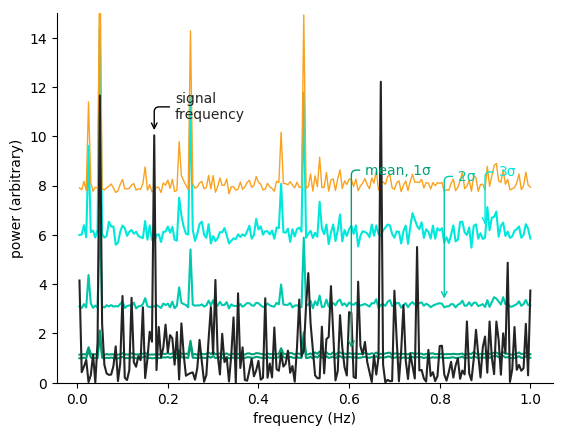

In [106]:
plot(freqs, mean(nullperiodograms, 2), color = "C3")
plot(freqs, pups[1], color = "C3")
plot(freqs, pups[2], color = brighten("C3", 0.5))
plot(freqs, pups[3], color = brighten("C3", 0.8))

# plot(freqs, false_alarm_thresholds[1], color = "C1")
plot(freqs, false_alarm_thresholds[2], color = "C1", lw = 1)
# plot(freqs, false_alarm_thresholds[3], color = "C1")

plot(freqs, p)

annotate("signal\nfrequency", color = "C0",
         xy=(realf, 1.01 * p[irealf]), xycoords="data",
         xytext=(15, 10), textcoords="offset points",
         horizontalalignment = "left",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=180,angleB=90,rad=5"))




annotate("3σ", color = brighten("C3", 0.8),
         xy=(0.9, 6.3), xycoords="data",
         xytext=(10, 40), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=0,angleB=90,rad=5",
                           "color" => brighten("C3", 0.8)))

annotate("2σ", color = brighten("C3", 0.5),
         xy=(0.81, 3.3), xycoords="data",
         xytext=(10, 90), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=0,angleB=90,rad=5",
                           "color" => brighten("C3", 0.5)))

annotate("mean, 1σ", color = brighten("C3", 0),
         xy=(0.605, 1.3), xycoords="data",
         xytext=(10, 130), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=0,angleB=90,rad=5",
                           "color" => brighten("C3", 0)))


# yscale("log")
# xscale("log")
xlabel("frequency (Hz)")
ylabel("power (arbitrary)")

ylim(0, 15)

savefig("../gfx/axions/basic_detection.pdf")

In [22]:
function findleastprobable(nullperiodograms)
    [ nullperiodograms[ findmax(sum(nullperiodograms[:,i] .> nullperiodograms, 2))[2], i]
    for i in 1:size(nullperiodograms, 2) ]
end

findleastprobable (generic function with 1 method)

In [23]:
leastprobablepowers = findleastprobable(nullperiodograms)

10000-element Array{Float64,1}:
 4.52309
 7.13833
 5.03513
 6.59557
 3.92001
 3.12433
 5.09235
 8.30862
 3.5538 
 4.24732
 5.53113
 6.10525
 6.32463
 ⋮      
 9.48975
 5.17488
 6.8829 
 7.54237
 3.99535
 4.96425
 5.64864
 8.14287
 6.30663
 6.70453
 8.68909
 4.68103

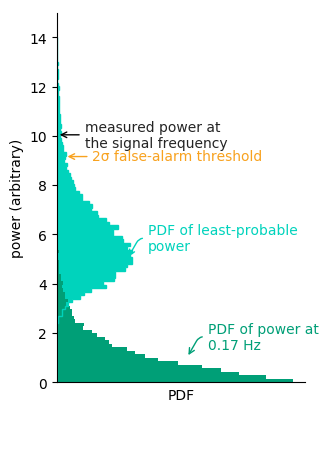

In [16]:
figure(figsize=(6.4 / 2, 4.8))

mybins = linspace(0, 14, 100)

plt[:hist](leastprobablepowers, orientation = "horizontal", color = brighten("C3", 0.6), bins = mybins, normed = true)

plt[:hist](nullperiodograms[irealf, :], orientation = "horizontal", color = "C3", bins = mybins, normed = true)

# just to get the line on top
plt[:hist](leastprobablepowers, orientation = "horizontal", color = brighten("C3", 0.6), bins = mybins, normed = true,
histtype = "step")


annotate("measured power at\nthe signal frequency", color = "C0",
         xy=(0, p[irealf]), xycoords="data",
         xytext=(20, 0), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "arc,angleB=0,armB=20,rad=5"))

annotate("PDF of power at\n$realf Hz", color = "C3",
         xy=(0.5, 1), xycoords="data",
         xytext=(15, 15), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=0,angleB=60,rad=5",
                           "color" => "C3"))


annotate("PDF of least-probable\npower", color = brighten("C3", 0.6),
         xy=(0.27, 5), xycoords="data",
         xytext=(15, 15), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=0,angleB=60,rad=5",
                           "color" => brighten("C3", 0.6)))

annotate("2σ false-alarm threshold", color = "C1",
         xy=(0.03, quantile(leastprobablepowers, confidencelevels[2])), xycoords="data",
         xytext=(20, 0), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "arc,angleB=0,armB=20,rad=5",
                           "color" => "C1"))

annotate("3σ false-alarm threshold", color = "C1",
         xy=(0.03, quantile(leastprobablepowers, confidencelevels[3])), xycoords="data",
         xytext=(20, 0), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "arc,angleB=0,armB=20,rad=5",
                           "color" => "C1"))



ylabel("power (arbitrary)")
xlabel("PDF")

xticks([])

ylim(0, 15)

savefig("../gfx/axions/basic_detection_histogram.pdf")

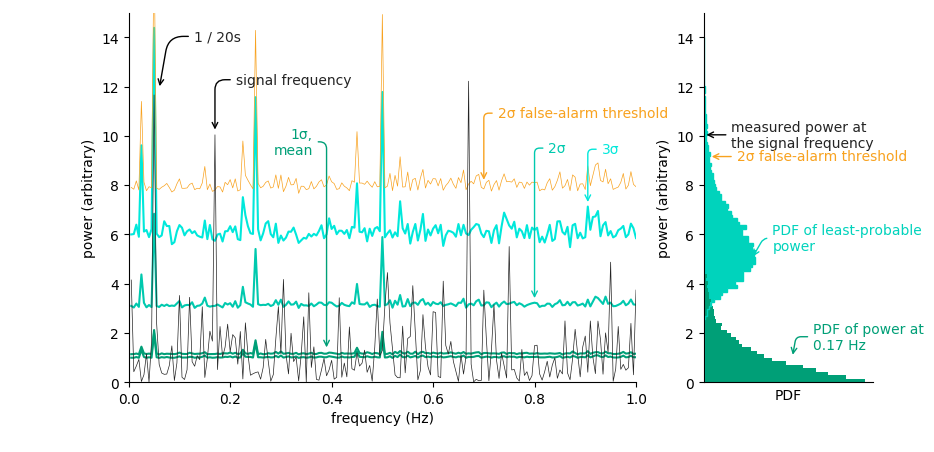

In [114]:
fig, axs = subplots(1, 2, gridspec_kw = Dict("width_ratios" => [3, 1]), figsize=(6.4 * 1.5, 4.8))



sca(axs[1])
plot(freqs, mean(nullperiodograms, 2), color = "C3")
plot(freqs, pups[1], color = "C3")
plot(freqs, pups[2], color = brighten("C3", 0.5))
plot(freqs, pups[3], color = brighten("C3", 0.8))

# plot(freqs, false_alarm_thresholds[1], color = "C1")
plot(freqs, false_alarm_thresholds[2], color = "C1", lw = 0.5)
# plot(freqs, false_alarm_thresholds[3], color = "C1")

plot(freqs, p, lw = 0.5)

annotate("signal frequency", color = "C0",
         xy=(realf, 1.01 * p[irealf]), xycoords="data",
         xytext=(15, 35), textcoords="offset points",
         horizontalalignment = "left",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=180,angleB=90,rad=10"))

annotate("1 / 20s", color = "C0",
         xy=(1 / 20 + 0.01, 11.9), xycoords="data",
         xytext=(25, 35), textcoords="offset points",
         horizontalalignment = "left",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=180,angleB=80,rad=15"))



annotate("3σ", color = brighten("C3", 0.8),
         xy=(0.905, 7.2), xycoords="data",
         xytext=(10, 40), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=0,angleB=90,rad=5",
                           "color" => brighten("C3", 0.8)))

annotate("2σ", color = brighten("C3", 0.5),
         xy=(0.8, 3.3), xycoords="data",
         xytext=(10, 110), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=0,angleB=90,rad=5",
                           "color" => brighten("C3", 0.5)))

annotate("1σ,\nmean", color = brighten("C3", 0),
         xy=(0.39, 1.3), xycoords="data",
         xytext=(-10, 150), textcoords="offset points",
         horizontalalignment = "right",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=180,angleB=90,rad=7",
                           "color" => brighten("C3", 0)))

annotate("2σ false-alarm threshold", color = "C1",
         xy=(0.7, 8.1), xycoords="data",
         xytext=(10, 50), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=0,angleB=90,rad=5",
                           "color" => "C1"))



# yscale("log")
# xscale("log")
xlabel("frequency (Hz)")
ylabel("power (arbitrary)")

ylim(0, 15)
# yscale("log")
margins(x=0)
xlim(xmin=0)



sca(axs[2])

mybins = linspace(0, 14, 100)

plt[:hist](leastprobablepowers, orientation = "horizontal", color = brighten("C3", 0.6), bins = mybins, normed = true)

plt[:hist](nullperiodograms[irealf, :], orientation = "horizontal", color = "C3", bins = mybins, normed = true)

# just to get the line on top
plt[:hist](leastprobablepowers, orientation = "horizontal", color = brighten("C3", 0.6), bins = mybins, normed = true,
histtype = "step")


annotate("measured power at\nthe signal frequency", color = "C0",
         xy=(0, p[irealf]), xycoords="data",
         xytext=(20, 0), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "arc,angleB=0,armB=20,rad=5"))

annotate("PDF of power at\n$realf Hz", color = "C3",
         xy=(0.5, 1), xycoords="data",
         xytext=(15, 15), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=0,angleB=80,rad=5",
                           "color" => "C3"))


annotate("PDF of least-probable\npower", color = brighten("C3", 0.6),
         xy=(0.27, 5), xycoords="data",
         xytext=(15, 15), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=0,angleB=60,rad=5",
                           "color" => brighten("C3", 0.6)))

annotate("2σ false-alarm threshold", color = "C1",
         xy=(0.03, quantile(leastprobablepowers, confidencelevels[2])), xycoords="data",
         xytext=(20, 0), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "arc,angleB=0,armB=20,rad=5",
                           "color" => "C1"))

annotate("3σ false-alarm threshold", color = "C1",
         xy=(0.03, quantile(leastprobablepowers, confidencelevels[3])), xycoords="data",
         xytext=(20, 0), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "arc,angleB=0,armB=20,rad=5",
                           "color" => "C1"))



ylabel("power (arbitrary)")
xlabel("PDF")

xticks([])
    
ylim(0, 15)
# yscale("log")

savefig("../gfx/axions/basic_detection.pdf")

In [24]:
exclampls = logspace(-1, 1, 50)
exclfreqs = logspace(-3, 1, 50)

signalperiodograms = mcsignalpowers(as, exclfreqs, exclampls,
    mcmultiplicity = 100, fitoffsets = false, simjumpsize = 0)

exclnullperiodograms = mcperiodograms(as, exclfreqs, 0, realf, mcmultiplicity = 10000,
    fitoffsets = false, simjumpsize = 0)

frequency 0.001, amplitude 0.1
frequency 0.0012067926406393288, amplitude 0.1
frequency 0.0014563484775012444, amplitude 0.1
frequency 0.0017575106248547913, amplitude 0.1
frequency 0.0021209508879201904, amplitude 0.1
frequency 0.002559547922699536, amplitude 0.1
frequency 0.0030888435964774815, amplitude 0.1
frequency 0.0037275937203149418, amplitude 0.1
frequency 0.004498432668969444, amplitude 0.1
frequency 0.005428675439323859, amplitude 0.1
frequency 0.006551285568595509, amplitude 0.1
frequency 0.0079060432109077, amplitude 0.1
frequency 0.009540954763499945, amplitude 0.1
frequency 0.011513953993264475, amplitude 0.1
frequency 0.013894954943731374, amplitude 0.1
frequency 0.016768329368110083, amplitude 0.1
frequency 0.020235896477251564, amplitude 0.1
frequency 0.02442053094548651, amplitude 0.1
frequency 0.029470517025518114, amplitude 0.1
frequency 0.03556480306223129, amplitude 0.1
frequency 0.04291934260128778, amplitude 0.1
frequency 0.0517947467923121, amplitude 0.1
freq

Progress: 100%|█████████████████████████████████████████| Time: 0:00:45


50×10000 Array{Float64,2}:
 203.373     16.9313     7.01254    …  31.0419    17.6238    51.2937   
  98.285      8.07818    3.49985       15.7228     8.83581   25.6384   
  48.0418     3.87293    1.79086        8.18676    4.55508   13.1494   
  23.8797     1.86862    0.949367       4.41689    2.44524    6.99498  
  12.171      0.908443   0.528905       2.48755    1.39213    3.91593  
   6.44887    0.444763   0.31583    …   1.46727    0.863447   2.34984  
   3.64819    0.217694   0.2081         0.89817    0.607162   1.54164  
   2.34857    0.103239   0.160123       0.55781    0.513674   1.11665  
   1.98153    0.0413829  0.168824       0.449924   0.564461   0.875567 
   2.1117     0.0073102  0.293187       1.16447    0.821279   0.873747 
   1.28305    0.0801081  0.495046   …   2.33902    1.40187    1.56745  
   1.24396    0.480478   0.409854       1.87526    1.48065    1.84172  
   2.43841    0.412532   0.0551687      0.496677   0.563845   1.36564  
   ⋮                                ⋱

In [25]:
CLmap = exclusionreport(as, R, exclfreqs, exclampls, exclnullperiodograms, signalperiodograms, fitoffsets = false)
CLmap_noCLs = exclusionreport(as, R, exclfreqs, exclampls, exclnullperiodograms, signalperiodograms, fitoffsets = false,
    useCLsmethod = false)

50×50 Array{Float64,2}:
 0.01  0.03  0.03  0.02  0.01  0.02  …  0.93  0.96  0.99  1.0   1.0   1.0 
 0.01  0.0   0.0   0.03  0.02  0.01     1.0   1.0   1.0   1.0   1.0   1.0 
 0.02  0.0   0.0   0.01  0.01  0.01     1.0   1.0   1.0   1.0   1.0   1.0 
 0.03  0.0   0.03  0.01  0.01  0.01     1.0   1.0   1.0   1.0   1.0   1.0 
 0.01  0.01  0.02  0.01  0.02  0.05     1.0   1.0   1.0   1.0   1.0   1.0 
 0.0   0.03  0.02  0.02  0.01  0.02  …  1.0   1.0   1.0   1.0   1.0   1.0 
 0.02  0.01  0.02  0.01  0.01  0.0      1.0   1.0   1.0   1.0   1.0   1.0 
 0.0   0.0   0.0   0.0   0.02  0.03     1.0   1.0   1.0   1.0   1.0   1.0 
 0.01  0.01  0.04  0.04  0.01  0.04     1.0   1.0   1.0   1.0   1.0   1.0 
 0.03  0.06  0.06  0.06  0.1   0.11     1.0   1.0   1.0   1.0   1.0   1.0 
 0.08  0.05  0.03  0.06  0.09  0.06  …  1.0   1.0   1.0   1.0   1.0   1.0 
 0.2   0.24  0.2   0.21  0.16  0.22     1.0   1.0   1.0   1.0   1.0   1.0 
 0.61  0.66  0.63  0.59  0.66  0.72     1.0   1.0   1.0   1.0   1.0   1.0 
 

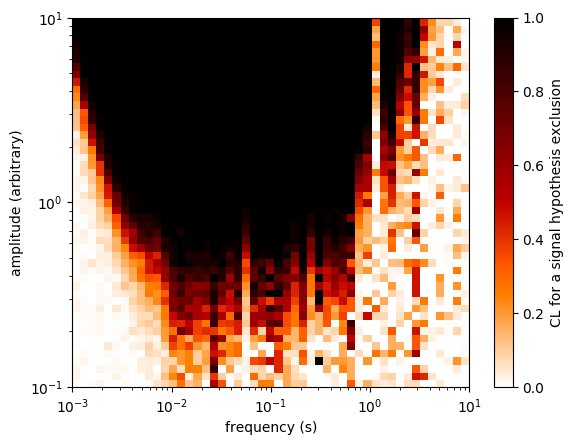

In [139]:
# boundsgrid(a) = logspace(extrema(log10(a))..., length(a) + 1)
pcol = pcolormesh(exclfreqs, exclampls, CLmap',
           vmax=1, vmin=0, cmap="gist_heat_r", rasterized = true) #linewidth = 0)
# pcol[:set_edgecolor](:face) # ref. https://stackoverflow.com/questions/27092991/white-lines-in-matplotlibs-pcolor#27096694
colorbar(label="CL for a signal hypothesis exclusion")
xscale("log")
xlabel("frequency (s)")
yscale("log")
ylabel("amplitude (arbitrary)")

gca()[:spines]["top"][:set_visible](true)
gca()[:spines]["right"][:set_visible](true)

savefig("../gfx/axions/basic_exclusion.pdf")

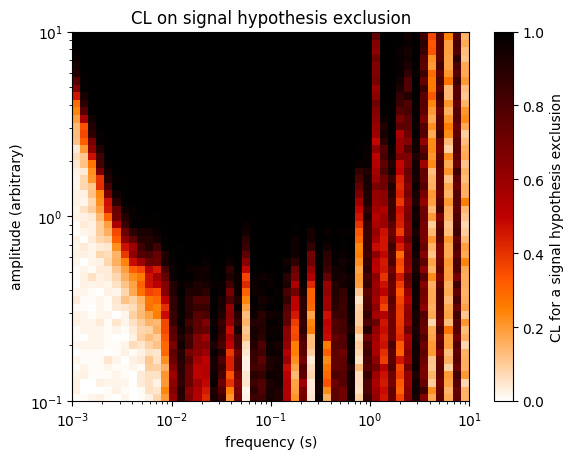

In [159]:
# boundsgrid(a) = logspace(extrema(log10(a))..., length(a) + 1)
pcol = pcolormesh(exclfreqs, exclampls, CLmap_noCLs',
           vmax=1, vmin=0, cmap="gist_heat_r", rasterized = true) #linewidth = 0)
# pcol[:set_edgecolor](:face)
colorbar(label="CL for a signal hypothesis exclusion")
xscale("log")
xlabel("frequency (s)")
yscale("log")
ylabel("amplitude (arbitrary)")
title("CL on signal hypothesis exclusion")

gca()[:spines]["top"][:set_visible](true)
gca()[:spines]["right"][:set_visible](true)

savefig("../gfx/axions/basic_exclusion_noCls.pdf")

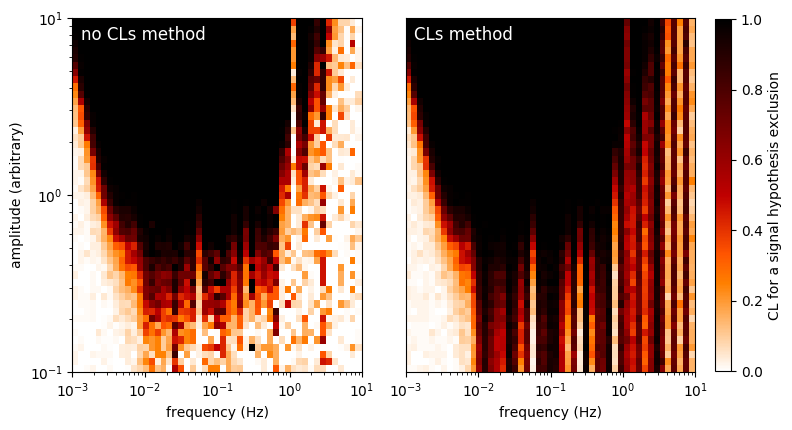

In [63]:
fig, axs = subplots(nrows = 1, ncols = 2, figsize=(8, 4.4))

sca(axs[1])
pcol = pcolormesh(exclfreqs, exclampls, CLmap',
           vmax=1, vmin=0, cmap="gist_heat_r", rasterized = true) #linewidth = 0)
# pcol[:set_edgecolor](:face) # ref. https://stackoverflow.com/questions/27092991/white-lines-in-matplotlibs-pcolor#27096694
xscale("log")
xlabel("frequency (Hz)")
yscale("log")
ylabel("amplitude (arbitrary)")

gca()[:spines]["top"][:set_visible](true)
gca()[:spines]["right"][:set_visible](true)

text(1.3e-3, 0.9e1, "no CLs method", color = "white", size = "large",
    horizontalalignment = "left", verticalalignment = "top")



sca(axs[2])
pcol = pcolormesh(exclfreqs, exclampls, CLmap_noCLs',
           vmax=1, vmin=0, cmap="gist_heat_r", rasterized = true) #linewidth = 0)
# pcol[:set_edgecolor](:face)
xscale("log")
xlabel("frequency (Hz)")
yscale("log")

gca()[:spines]["top"][:set_visible](true)
gca()[:spines]["right"][:set_visible](true)
yticks([])
tick_params(which = "both", left = false)
text(1.3e-3, 0.9e1, "CLs method", color = "white", size = "large",
    horizontalalignment = "left", verticalalignment = "top")

colorbar(pcol, cax = axes([0.9, 0.145, 0.02, 0.8]), # left, bottom, width, height
    label="CL for a signal hypothesis exclusion")

tight_layout(rect=[0, 0, 0.91, 1])

savefig("../gfx/axions/basic_exclusion.pdf")

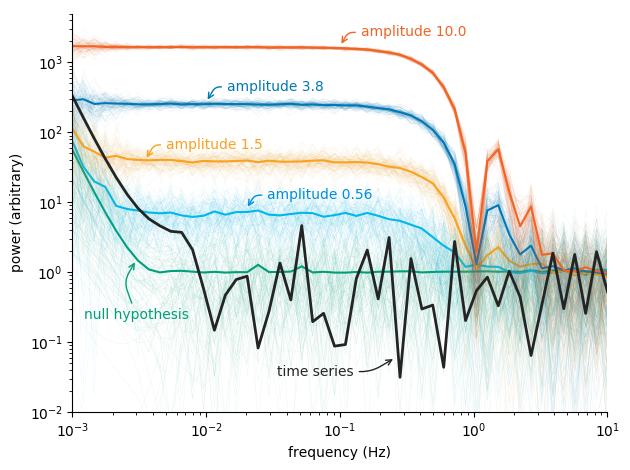

In [64]:
mycolors = ["C3", "C2", "C1", "C5", "C6"]

for j in 1:100
#     plot(exclfreqs, exclnullperiodograms[:, j], lw = 0.25, color = brighten(mycolors[1], 0.9))
    plot(exclfreqs, exclnullperiodograms[:, j], lw = 0.25, color = mycolors[1], alpha = 0.1)
end
plot(exclfreqs, mean(exclnullperiodograms, 2), lw = 1.5, color = mycolors[1])


for (mycolor, i) in zip(mycolors[2:end], [10, 15, 20, 25] .* 50 .÷ 25 )
    for j in 1:100
        plot(exclfreqs, signalperiodograms[:, i, j], lw = 0.25, color = mycolor, alpha = 0.1)
    end
    plot(exclfreqs, mean(signalperiodograms, 3)[:, i], lw = 1.5, color = mycolor)
end
# plot(exclfreqs, signalperiodograms[:, 10], lw = 1, color = "C2")
# plot(exclfreqs, signalperiodograms[:, 15], lw = 1, color = "C3")
# plot(exclfreqs, signalperiodograms[:, 25], lw = 2, color = "C4")

plot(exclfreqs, periodogramLSSA(exclfreqs, as, R), lw = 2, color = "C0", label = "time series")


annotate("amplitude 10.0", color = mycolors[5],
         xy=(1e-1, 1.7e3), xycoords="data",
         xytext=(15, 10), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=0,angleB=60,rad=5",
                           "color" => mycolors[5]))

annotate("amplitude 3.8", color = mycolors[4],
         xy=(1e-2, 2.7e2), xycoords="data",
         xytext=(15, 11), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=0,angleB=60,rad=5",
                           "color" => mycolors[4]))

annotate("amplitude 1.5", color = mycolors[3],
         xy=(3.5e-3, 4e1), xycoords="data",
         xytext=(15, 11), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=0,angleB=60,rad=5",
                           "color" => mycolors[3]))

annotate("amplitude 0.56", color = brighten(mycolors[2], -0.8),
         xy=(2e-2, 8e0), xycoords="data",
         xytext=(15, 10), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=0,angleB=60,rad=5",
                           "color" => brighten(mycolors[2], -0.8)))


annotate("null hypothesis", color = mycolors[1],
         xy=(3e-3, 1.5), xycoords="data",
         xytext=(0, -40), textcoords="offset points",
         horizontalalignment = "center",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=110,angleB=-120,rad=10",
                           "color" => mycolors[1]))

annotate("time series", color = "C0",
         xy=(2.6e-1, 0.6e-1), xycoords="data",
         xytext=(-30, -10), textcoords="offset points",
         horizontalalignment = "right",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=0,angleB=-150,rad=10",
                           "color" => "C0"))


# legend(fontsize = "small", ncol = 3)

xlabel("frequency (Hz)")
ylabel("power (arbitrary)")

margins(x = 0)

xscale("log")
yscale("log")

ylim(1e-2, 5e3)

tight_layout()

savefig("../gfx/axions/basic_exclusion_sensitivity.pdf")

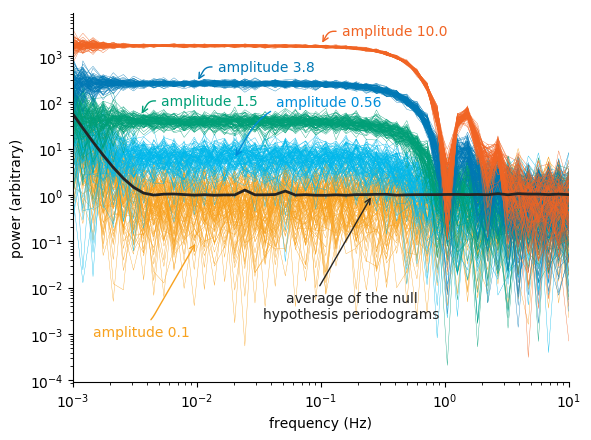

In [169]:
mycolors = ["C1", "C2", "C3", "C5", "C6"]

for (mycolor, i) in zip(mycolors, [1, 10, 15, 20, 25] .* 50 .÷ 25 )
    plot(exclfreqs, signalperiodograms[:, i, 1], lw = 0.25, color = mycolor, label = "amplitude $(signif(exclampls[i], 2))")
    for j in 2:100
        plot(exclfreqs, signalperiodograms[:, i, j], lw = 0.25, color = mycolor)
    end
end
# plot(exclfreqs, signalperiodograms[:, 10], lw = 1, color = "C2")
# plot(exclfreqs, signalperiodograms[:, 15], lw = 1, color = "C3")
# plot(exclfreqs, signalperiodograms[:, 25], lw = 2, color = "C4")

# plot(exclfreqs, periodogramLSSA(exclfreqs, as, R), lw = 2, color = "C0", label = "time series")
plot(exclfreqs, mean(exclnullperiodograms, 2), lw = 2, color = "C0", label = "time series")


annotate("amplitude 10.0", color = mycolors[5],
         xy=(1e-1, 1.7e3), xycoords="data",
         xytext=(15, 10), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=0,angleB=60,rad=5",
                           "color" => mycolors[5]))

annotate("amplitude 3.8", color = mycolors[4],
         xy=(1e-2, 2.7e2), xycoords="data",
         xytext=(15, 11), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=0,angleB=60,rad=5",
                           "color" => mycolors[4]))

annotate("amplitude 1.5", color = mycolors[3],
         xy=(3.5e-3, 5e1), xycoords="data",
         xytext=(15, 11), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=0,angleB=60,rad=5",
                           "color" => mycolors[3]))

annotate("amplitude 0.56", color = brighten(mycolors[2], -0.8),
         xy=(2e-2, 6e0), xycoords="data",
         xytext=(30, 41), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=0,angleB=60,rad=40",
                           "color" => brighten(mycolors[2], -0.8)))


annotate("amplitude 0.1", color = mycolors[1],
         xy=(1e-2, 1e-1), xycoords="data",
         xytext=(-5, -65), textcoords="offset points",
         horizontalalignment = "right",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=180,angleB=-120,rad=20",
                           "color" => mycolors[1]))

annotate("average of the null\nhypothesis periodograms", color = "C0",
         xy=(2.6e-1, 1), xycoords="data",
         xytext=(-15, -80), textcoords="offset points",
         horizontalalignment = "center",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=180,angleB=-120,rad=20",
                           "color" => "C0"))


# legend(fontsize = "small", ncol = 3)

xlabel("frequency (Hz)")
ylabel("power (arbitrary)")

margins(x = 0)

xscale("log")
yscale("log")

# savefig("../gfx/axions/basic_exclusion_sensitivity.pdf")

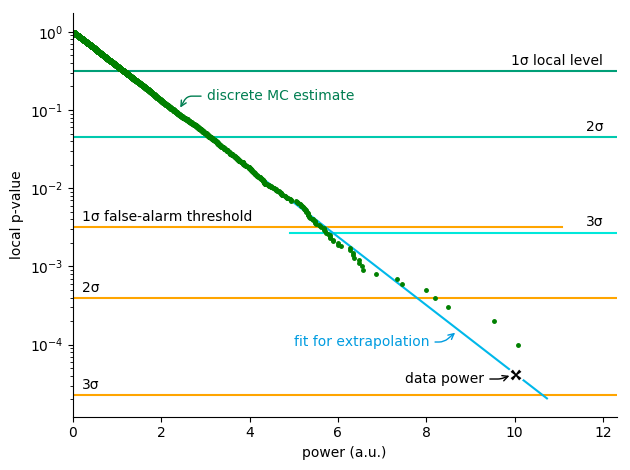

In [65]:
ifreq = searchsortedfirst(freqs, realf)

mccdf = eachindex(sort(nullperiodograms[ifreq, :])) / length(sort(nullperiodograms[ifreq, :]))

# plot the global 1-,...,5-sigma discovery thresholds
for i in 1:3
    axhline(localpvals[i], color = "orange", xmax = (i == 1 ? 0.9 : 1))
    text(0.2, localpvals[i] * 1.1, "$(i)σ" * (i == 1 ? " false-alarm threshold" : ""),
        horizontalalignment = "left", verticalalignment = "bottom")
end

# plot the local sigma thresholds
axhline(globalpvals[1], color = "C3")
text(12, globalpvals[1] * 1.1, "1σ local level",
    horizontalalignment = "right", verticalalignment = "bottom")
axhline(globalpvals[2], color = brighten("C3", 0.5))
text(12, globalpvals[2] * 1.1, "2σ",
    horizontalalignment = "right", verticalalignment = "bottom")
axhline(globalpvals[3], color = brighten("C3", 0.8), xmin=0.4)
text(12, globalpvals[3] * 1.1, "3σ",
    horizontalalignment = "right", verticalalignment = "bottom")

pp = [linspace(extrema(mccdf)..., 10000); localdatacls[ifreq]^0.5] |> sort
plot(invCLfromfitres(cdf_fits[ifreq, :], pp), 1 - pp, color = "C2", label = "fit for extrapolation")

plot(sort(nullperiodograms[ifreq, :]), 1 - mccdf, color = "green",
    ".", markersize = 5, label = "discrete MC estimate")

# put the CL of the data value too
# axvline(p[ifreq])
# text(p[ifreq] * 0.99, 1, "data power",
#     rotation = "vertical", horizontalalignment = "right", verticalalignment = "top")
plot(p[ifreq], 1 - CLfromfitres(cdf_fits[ifreq, :], p[ifreq]),
    "X", markersize = 10, markeredgecolor = "white", markeredgewidth = 1.5, color = "black",
    label = "data power")
annotate("data power", color = "black",
         xy=(p[ifreq] - 0.1, 1 - CLfromfitres(cdf_fits[ifreq, :], p[ifreq])), xycoords="data",
         xytext=(-20, -3), textcoords="offset points",
         horizontalalignment = "right",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=0,angleB=200,rad=3",
                           "color" => "black"))

annotate("fit for extrapolation", color = brighten("C2", -0.5),
         xy=(8.7, 1.5e-4), xycoords="data",
         xytext=(-20, -8), textcoords="offset points",
         horizontalalignment = "right",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=0,angleB=220,rad=5",
                           "color" => brighten("C2", -0.5)))

annotate("discrete MC estimate", color = brighten("C3", -0.5),
         xy=(2.4, 1e-1), xycoords="data",
         xytext=(20, 10), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=0,angleB=60,rad=5",
                           "color" => brighten("C3", -0.5)))

xlabel("power (a.u.)")
ylabel("local p-value")
# title("least likely peak: frequency $(signif(freqs[ifreq], 6)) Hz")
# legend()
# use logit scale 
# yscale("logit")
yscale("log")
# xscale("log")
gca()[:yaxis][:set_minor_formatter](plt[:NullFormatter]())
# ylim(ymax = localdatacls[ifreq]^0.5)
xlim(xmin=0)

tight_layout()

savefig("../gfx/axions/MC_estimation_local.pdf")

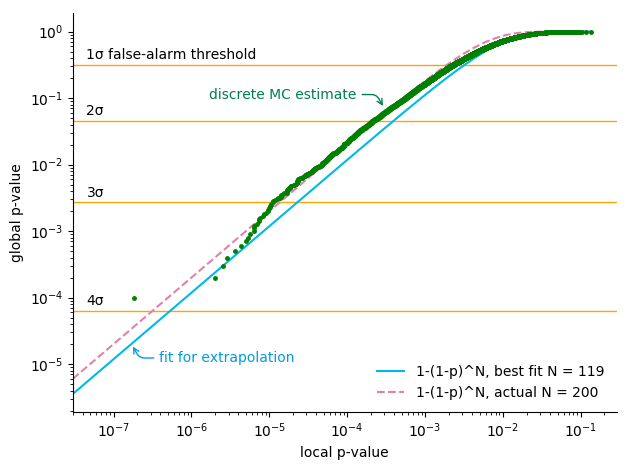

In [81]:
# plot the global 1-,...,5-sigma discovery thresholds
minplotlocalp = 3e-8

for i in 1:4
    axhline(globalpvals[i], color = "orange", lw = 1)
    text(minplotlocalp * 1.5,#(i == 5 ? 20 : 1.5),
        globalpvals[i] * 1.1,
        "$(i)σ" * (i == 1 ? " false-alarm threshold" : ""),
        horizontalalignment = "left", verticalalignment = "bottom")
end

plot(sort(minpvals), eachindex(minpvals) / length(minpvals),
    ".", markersize = 5, zorder = 10, color = "green")
pl = logspace(log10(minplotlocalp), log10(maximum(minpvals)))
plot(pl, 1 .- (1 .- pl).^nicks_effective_n,
    label = "1-(1-p)^N, best fit N = $(round(Int, nicks_effective_n))", color = "C2")
plot(pl, 1 .- (1 .- pl).^length(freqs),
    label = "1-(1-p)^N, actual N = $(length(freqs))", color = "C7", ls = "--")

# plot(localpvals, 1 .- (1 .- localpvals).^nicks_effective_n,
#     "X", zorder = 11, markersize = 10, markeredgecolor = "white", markeredgewidth = 1.5,
#     label = "false-alarm thresholds", color = "orange")

annotate("discrete MC estimate", color = brighten("C3", -0.5),
         xy=(3e-4, 0.7e-1), xycoords="data",
         xytext=(-20, 10), textcoords="offset points",
         horizontalalignment = "right",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=0,angleB=120,rad=5",
                           "color" => brighten("C3", -0.5)))

annotate("fit for extrapolation", color = brighten("C2", -0.5),
         xy=(1.7e-7, 2e-5), xycoords="data",
         xytext=(20, -10), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=0,angleB=300,rad=5",
                           "color" => brighten("C2", -0.5)))

xscale("log")
yscale("log")
# yscale("logit")
gca()[:yaxis][:set_minor_formatter](plt[:NullFormatter]())
# title("The CDF of the minimal local p-value")
xlabel("local p-value")
ylabel("global p-value")
legend()
xlim(xmin = minplotlocalp)
# savefig("plots/E0$(anname)_look-elsewhere.png", dpi = 200)

tight_layout()

savefig("../gfx/axions/MC_estimation_global.pdf")